In [25]:
import logging

import numpy as np

from matplotlib import pyplot as plt

from mplchart.samples import sample_prices
from mplchart.locator import DateIndexLocator
from mplchart.formatter import DateIndexFormatter


logging.basicConfig()



In [26]:
prices = sample_prices(freq="daily")
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600
1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600
1980-12-18,0.091736,0.092167,0.091736,0.091736,73449600
...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300


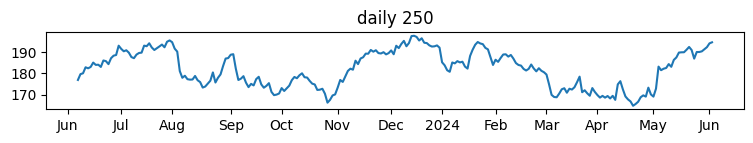

In [27]:
def test_chart(freq="daily", max_bars=250, figsize=(9, 1), date_format=None):

    if date_format == "date":
        date_format="%Y-%m-%d"

    if date_format == "time":
        date_format="%H-%M-%S"
    
    if date_format == "datetime":
        date_format="%Y-%m-%d %H-%M-%S"
    

    prices = sample_prices(freq=freq)
    
    close = prices.set_index(np.arange(len(prices))).close.tail(max_bars)
    
    title = f"{freq} {max_bars}"
    
    fig, ax = plt.subplots(figsize=figsize)
    
    locator = DateIndexLocator(prices.index)

    if date_format:
        def custom_formatter(x, pos):
            size = len(prices.index)
            loc = np.round(x).astype(int).clip(0, size-1)
            return prices.index[loc].strftime(date_format)
        formatter = custom_formatter
    else:
        formatter = DateIndexFormatter(prices.index)
        
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    ax.plot(close)
    plt.title(title)

   
test_chart()

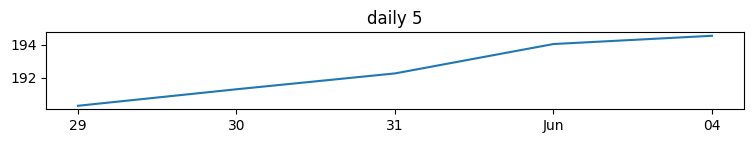

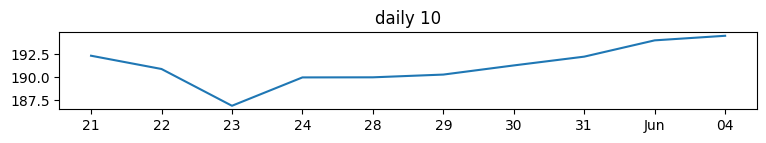

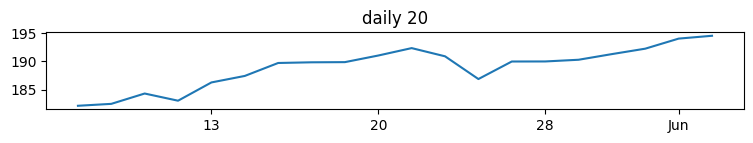

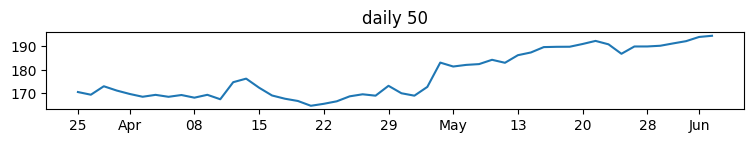

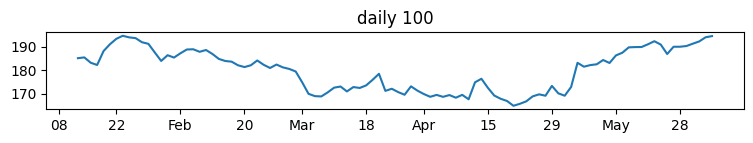

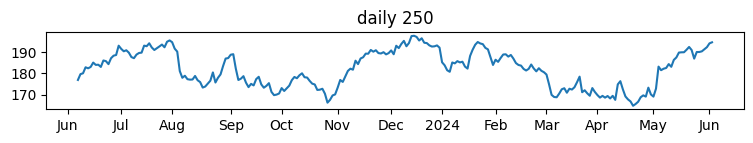

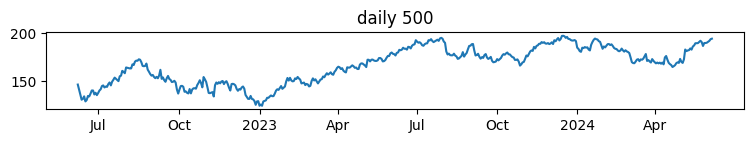

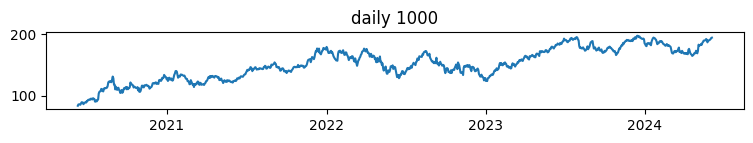

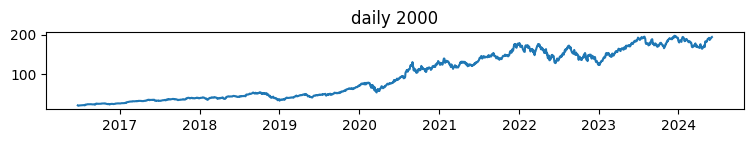

In [32]:
freq = "daily"
for num in 5, 10, 20, 50, 100, 250, 500, 1000, 2000:
    test_chart(freq, max_bars=num)

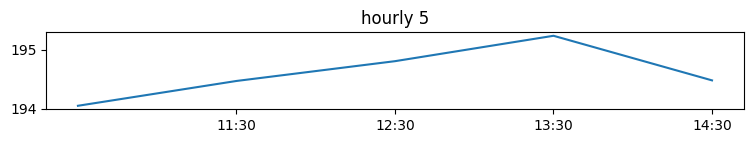

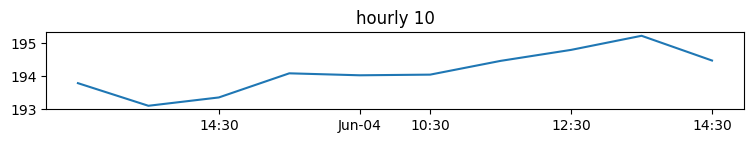

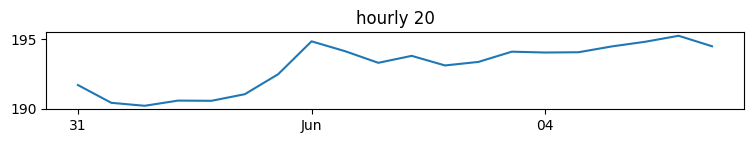

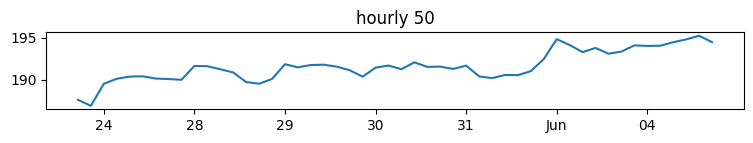

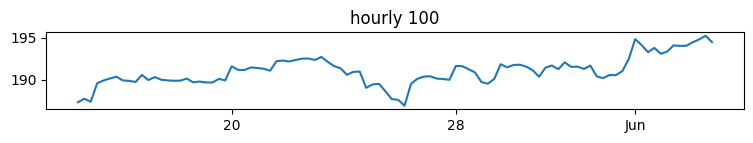

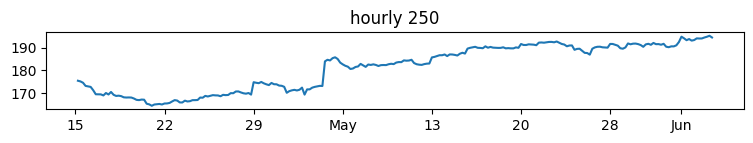

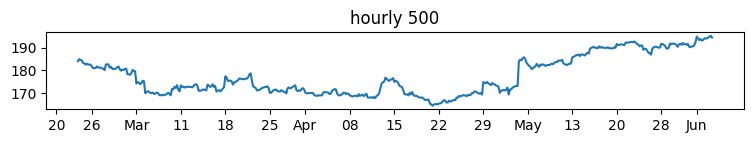

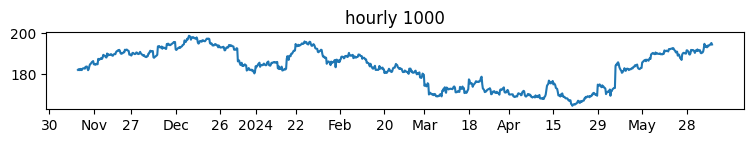

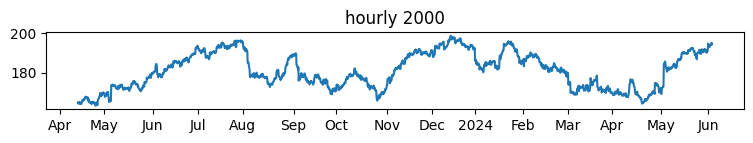

In [33]:
freq = "hourly"
for num in 5, 10, 20, 50, 100, 250, 500, 1000, 2000:
    test_chart(freq, max_bars=num)

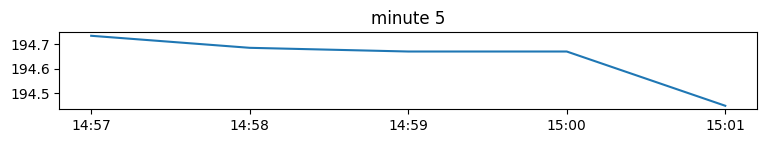

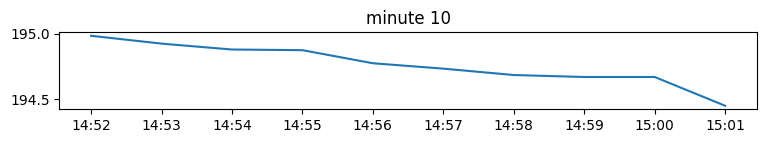

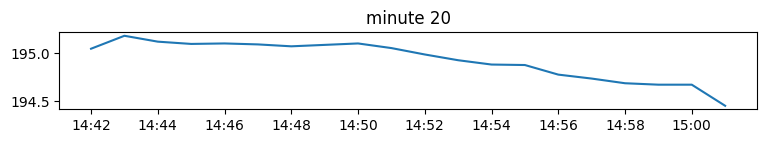

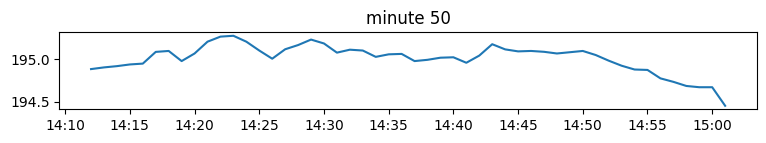

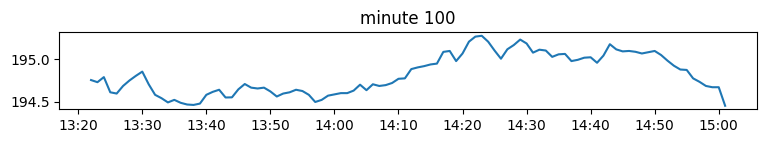

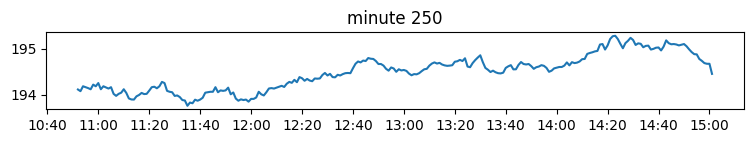

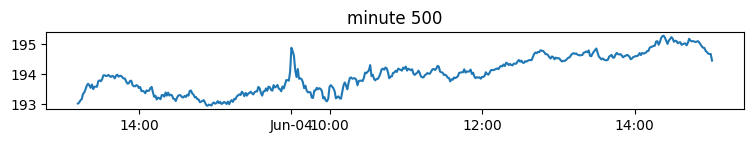

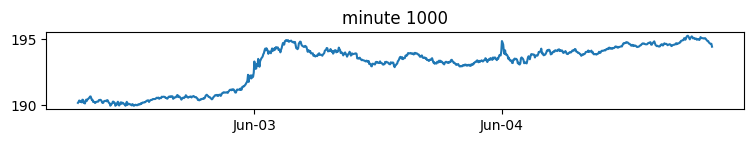

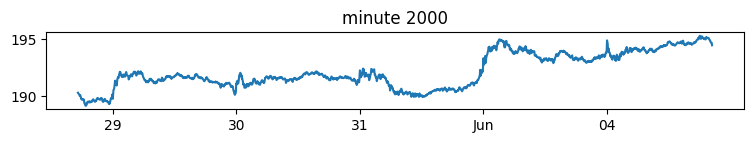

In [34]:
freq = "minute"
for num in 5, 10, 20, 50, 100, 250, 500, 1000, 2000:
    test_chart(freq, max_bars=num)
    

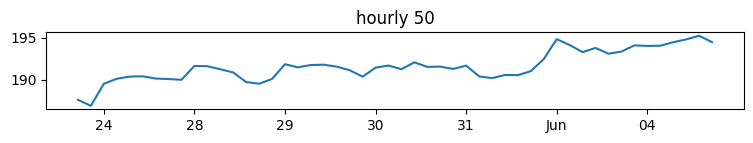

In [31]:
# logging.getLogger("mplchart.locator").setLevel(logging.DEBUG)

freq, max_bars = "hourly", 50
test_chart(freq, max_bars=max_bars)
